In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### All the data are in the numeric form that means the data is already cleaned

#### We also know that the target is outcome represented by 1 and 0

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#checking for the null values if any
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There is no null vlaue in the dataset

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc7dc54610>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc7dc54b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc7dc54370>,
 'medians': [<matplotlib.lines.Line2D at 0x2cc7dc650d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2cc7dc65370>,
 'means': []}

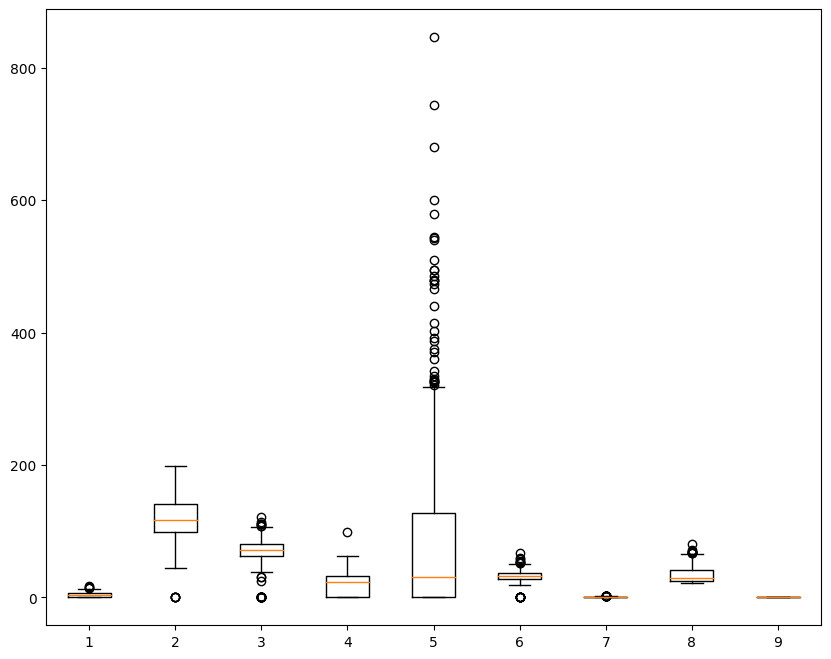

In [16]:
## Checking for the outliers
plt.figure(figsize=(10,8))
plt.boxplot(df)

<Axes: >

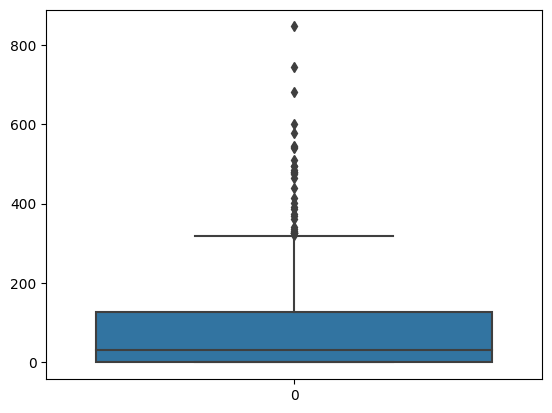

In [52]:
sns.boxplot(df['Insulin'])

We are trying to handle the outliers in the df['insulin'] part

In [54]:
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)

In [56]:
iqr = percentile75 - percentile25 
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr

In [58]:
upperlimit,lowerlimit

(318.125, -190.875)

In [69]:
df[df['Insulin'] > upperlimit].count()

Pregnancies                 34
Glucose                     34
BloodPressure               34
SkinThickness               34
Insulin                     34
BMI                         34
DiabetesPedigreeFunction    34
Age                         34
Outcome                     34
dtype: int64

Here we found that 34 data are the outliers So we will try to remove those data

In [67]:
df[df['Insulin']<lowerlimit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [70]:
df.shape


(768, 9)

In [71]:
dfNew = df[df['Insulin']<upperlimit]

In [72]:
dfNew.shape

(734, 9)

{'whiskers': [<matplotlib.lines.Line2D at 0x2cc7f4898b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cc7f489df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cc7f489610>,
 'medians': [<matplotlib.lines.Line2D at 0x2cc7f4a1370>,
 'fliers': [<matplotlib.lines.Line2D at 0x2cc7f4a1610>,
 'means': []}

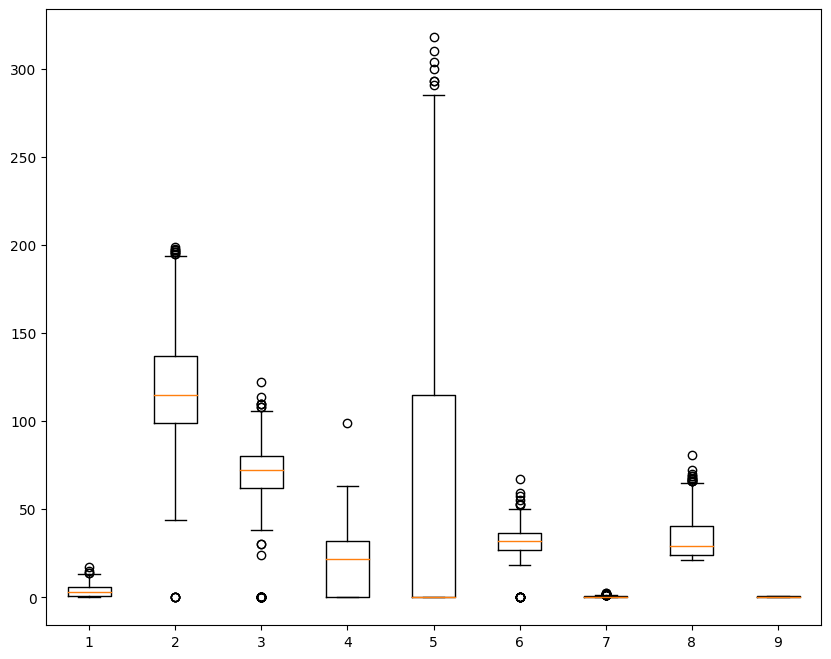

In [92]:
# Checking for the outliers
plt.figure(figsize=(10, 8))
plt.boxplot(dfNew)

In [73]:
## dividing the dependent and independent features

X = dfNew.iloc[:,:-1] #independent features
y = dfNew.iloc[:,-1] #dependent features

In [74]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [75]:
X.shape , y.shape

((734, 8), (734,))

In [76]:
## Splitting into the training and testing data
from sklearn.model_selection import train_test_split

xTest,xTrain,yTest,yTrain = train_test_split(X,y,train_size=0.25,random_state=33)

In [77]:
xTrain.shape,xTest.shape,yTrain.shape,yTest.shape

((551, 8), (183, 8), (551,), (183,))

In [78]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [79]:
regressor

DecisionTreeRegressor()

In [80]:
regressor.fit(xTrain,yTrain)

DecisionTreeRegressor()

In [81]:
ypred = regressor.predict(xTest)

In [82]:
from sklearn.metrics import r2_score,accuracy_score,precision_score,classification_report
Accuracyscore = accuracy_score(ypred,yTest)
R2Score = r2_score(ypred,yTest)

In [83]:
Accuracyscore,R2Score

(0.7049180327868853, -0.3630344827586207)

Here the accuracy score is quite low and the r2 score is even worse so we will do the hyper parameter tuning

In [84]:
parameter = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}
regressor = DecisionTreeRegressor()

In [85]:
## Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV
regressorCV = GridSearchCV(regressor,cv=5,param_grid=parameter,scoring='neg_mean_squared_error')

In [86]:
regressorCV.fit(xTrain,yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [87]:
regressorCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'splitter': 'best'}

In [88]:
regressor = DecisionTreeRegressor(criterion='squared_error',
                                  max_depth= 2,
                                  max_features = 'auto',
                                  splitter = 'best')


In [89]:
regressor.fit(xTest,yTest)

DecisionTreeRegressor(max_depth=2, max_features='auto')

In [90]:
yPredNew = regressor.predict(xTest)

[Text(0.5, 0.8333333333333334, 'x[1] <= 143.5\nsquared_error = 0.231\nsamples = 183\nvalue = 0.361'),
 Text(0.25, 0.5, 'x[5] <= 29.65\nsquared_error = 0.18\nsamples = 145\nvalue = 0.234'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.062\nsamples = 60\nvalue = 0.067'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.228\nsamples = 85\nvalue = 0.353'),
 Text(0.75, 0.5, 'x[6] <= 1.407\nsquared_error = 0.133\nsamples = 38\nvalue = 0.842'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.099\nsamples = 36\nvalue = 0.889'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = 0.0')]

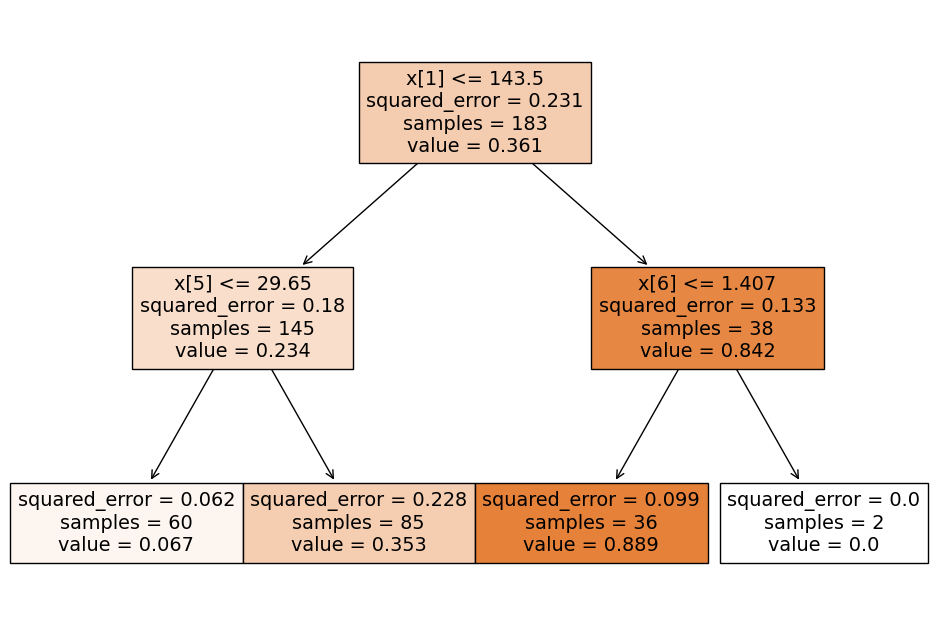

In [91]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(regressor,filled=True)